# Sara Khosarvi_Stat log (Shuttle) Data Set Prediction

## INTROUDUCTION
##############################################################################################################################

## DATA COLLECTION
##############################################################################################################################

In [1]:
import warnings
warnings.filterwarnings('ignore')

#import libraries for the data-structures
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

#import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

#import libraries from sklearn
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Input data files are available in the read-only "../input/" directory
import os
os.chdir(r'C:\Sara\Data SCIENCE\Machine Learning\Project\Data')
os.getcwd()

'C:\\Sara\\Data SCIENCE\\Machine Learning\\Project\\Data'

In [2]:
#import the dataset
data = pd.read_csv(r'C:\Sara\Data SCIENCE\Machine Learning\Project\Data\shuttle.tst', sep=" ",na_values='NA',header=None,
                    names = ['being time','Rad Flow', 'Fpv Close', 'Fpv Open','High','Bypass','Bpv Close','Bpv Open','class'])

In [3]:
data.shape

(14500, 9)

In [4]:
data.head(5)

,being time,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Close,Bpv Open,class
55,0,81,0,-6,11,25,88,64,4
56,0,96,0,52,-4,40,44,4,4
50,-1,89,-7,50,0,39,40,2,1
53,9,79,0,42,-2,25,37,12,4
55,2,82,0,54,-6,26,28,2,1


In [5]:
data.tail(5)

,being time,Rad Flow,Fpv Close,Fpv Open,High,Bypass,Bpv Close,Bpv Open,class
80,0,84,0,-36,-29,4,120,116,5
55,0,81,0,-20,25,26,102,76,4
55,0,77,0,12,-22,22,65,42,4
37,0,103,0,18,-16,66,85,20,1
56,2,98,0,52,1,42,46,4,4


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14500 entries, 55 to 56
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   being time  14500 non-null  int64
 1   Rad Flow    14500 non-null  int64
 2   Fpv Close   14500 non-null  int64
 3   Fpv Open    14500 non-null  int64
 4   High        14500 non-null  int64
 5   Bypass      14500 non-null  int64
 6   Bpv Close   14500 non-null  int64
 7   Bpv Open    14500 non-null  int64
 8   class       14500 non-null  int64
dtypes: int64(9)
memory usage: 1.1 MB


In [7]:
#making a copy of data before preprocessing
data_raw=data.copy()

In [8]:
#pandas_profiling.ProfileReport(data)

In [9]:
# Getting the summary of Data
data.describe()# for numeric columns
pd.options.display.float_format = "{:.2f}".format
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
being time,14500.00,0.54,77.40,-3161.00,0.00,0.00,0.00,4501.00
Rad Flow,14500.00,85.37,8.89,40.00,79.00,83.00,89.00,118.00
Fpv Close,14500.00,0.25,17.07,-362.00,0.00,0.00,0.00,1751.00
Fpv Open,14500.00,34.61,21.53,-46.00,28.00,42.00,46.00,310.00
High,14500.00,2.54,304.55,-26739.00,-4.00,0.00,6.00,15164.00
Bypass,14500.00,37.15,13.04,-18.00,32.00,39.00,42.00,73.00
Bpv Close,14500.00,50.84,21.28,-191.00,37.00,43.00,60.00,131.00
Bpv Open,14500.00,13.84,25.51,-264.00,0.00,2.00,14.00,126.00
class,14500.00,1.68,1.34,1.00,1.00,1.00,1.00,7.00


In [10]:
#finding count (number of non_missing values),unique values(or levels), top(mode) and freq(fequency of mode)
#Method 1
data.astype('object').describe().transpose()

,count,unique,top,freq
being time,14500,96,0,8953
Rad Flow,14500,46,77,1502
Fpv Close,14500,60,0,9578
Fpv Open,14500,49,46,1721
High,14500,120,0,4555
Bypass,14500,71,40,1222
Bpv Close,14500,113,37,701
Bpv Open,14500,67,0,5096
class,14500,7,1,11478


## Data Preprocessing 
###############################################################################################################################

In [11]:
#drop duplicate
data=data.drop_duplicates()

In [12]:
#Count missing values for each column of the dataframe 
data.isna().sum()

being time    0
Rad Flow      0
Fpv Close     0
Fpv Open      0
High          0
Bypass        0
Bpv Close     0
Bpv Open      0
class         0
dtype: int64

In [13]:
#All of Features Numerical we do not need to Features Coding

## Exploratory Analysis 
###############################################################################################################################

In [14]:
#shuffling data
data = data.sample(frac=1, random_state=0)

In [15]:
#CREATE A NEW CLEAN DATASET TO USE THAT IN SPARK PROJECT
df = data
df = df.to_csv('Shuttle.csv')

In [16]:
#CHOOSE TARGET
X = data.drop('class', axis=1)
y = data['class'].values

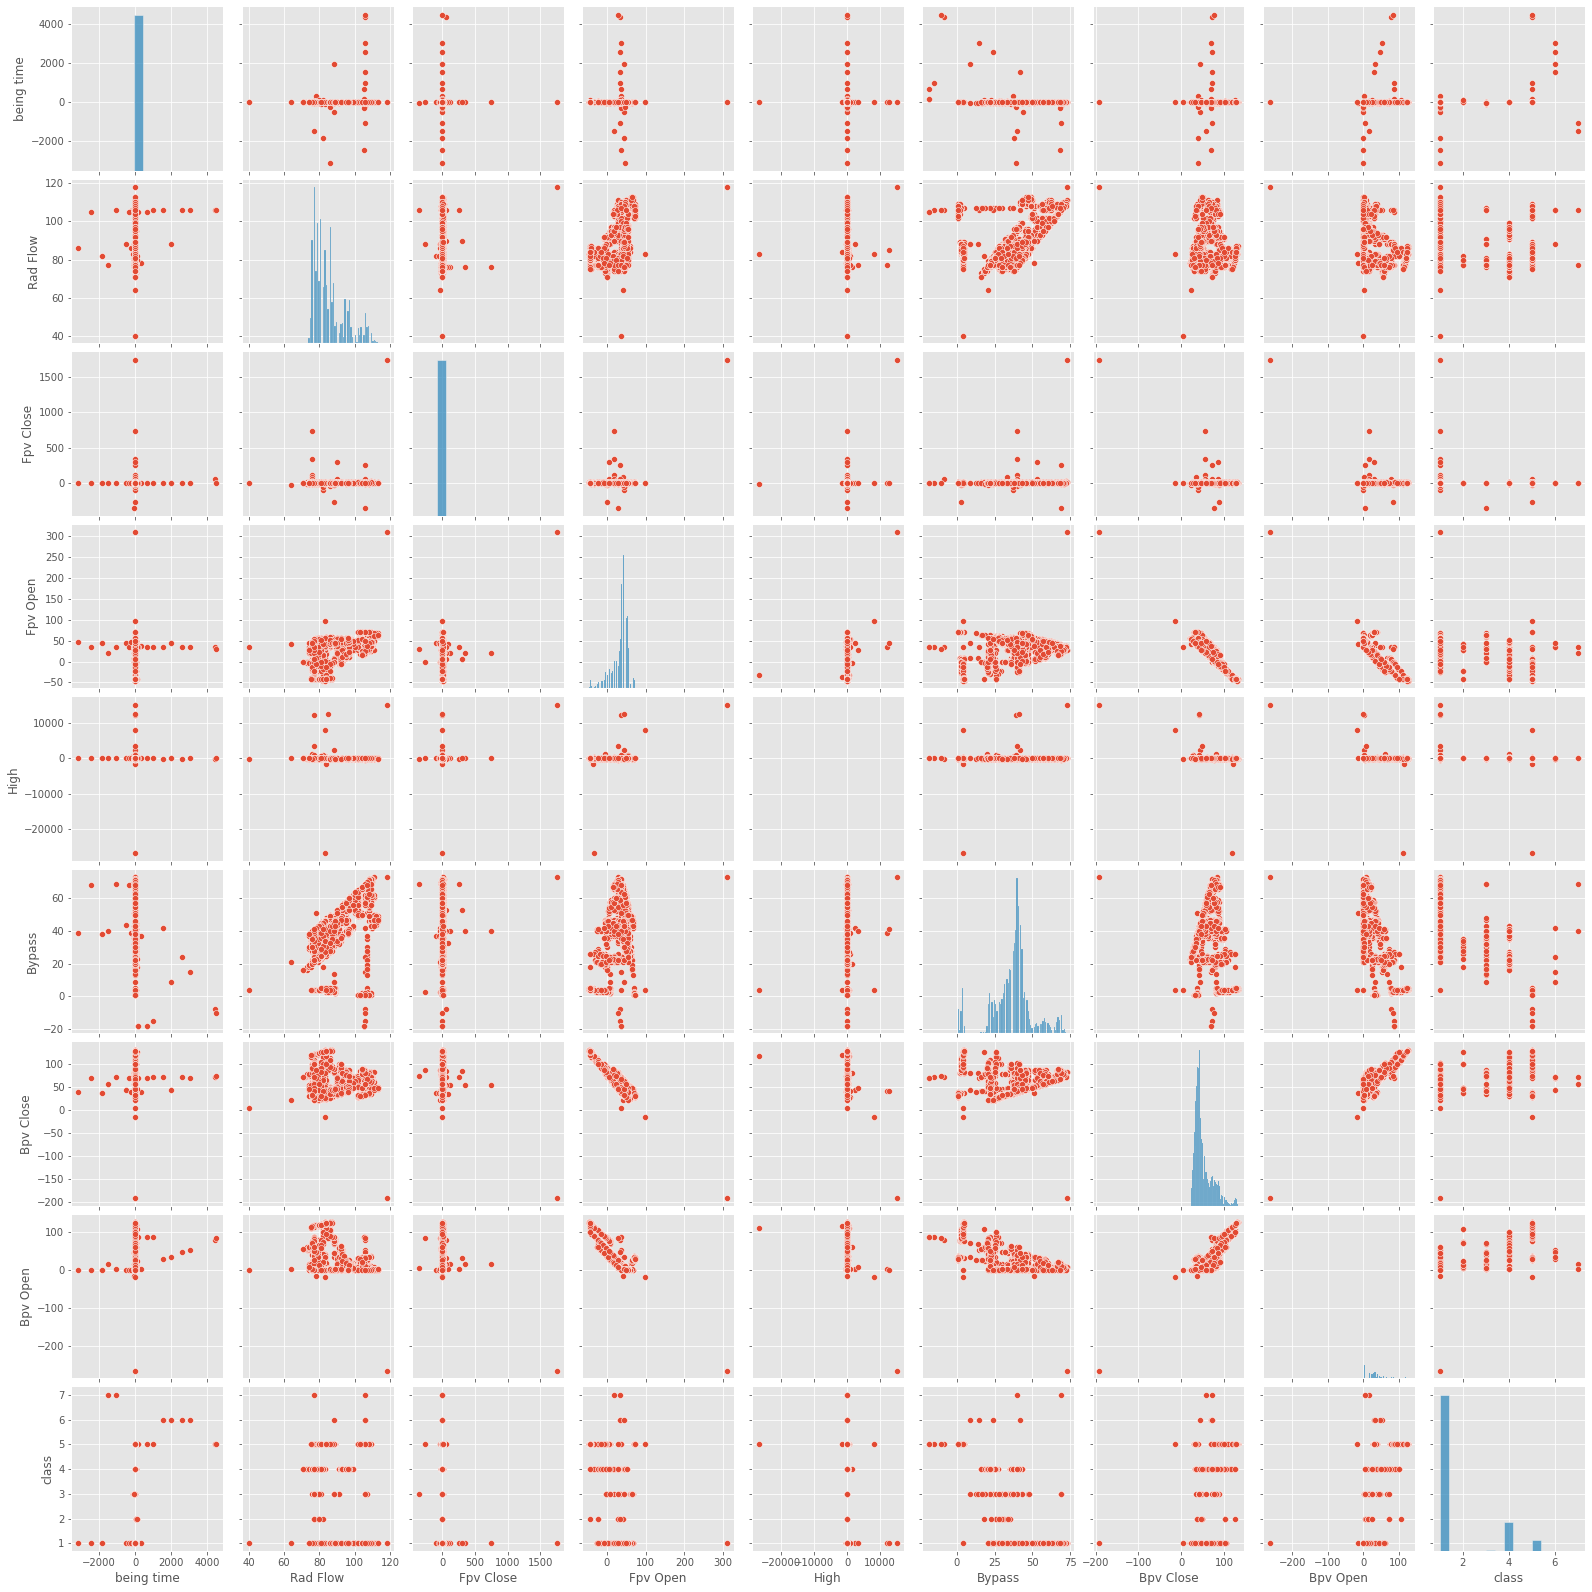

In [17]:
# Pairplot of all the numeric variables
sns.pairplot(data, vars=['being time','Rad Flow', 'Fpv Close', 'Fpv Open','High','Bypass','Bpv Close','Bpv Open','class'])
plt.show()

- Correlation and heatmap is used for NUMERICAL VARIABLE , therefore when we want to use that in classifier dataset, we must drop TARGET in heat map and correlation

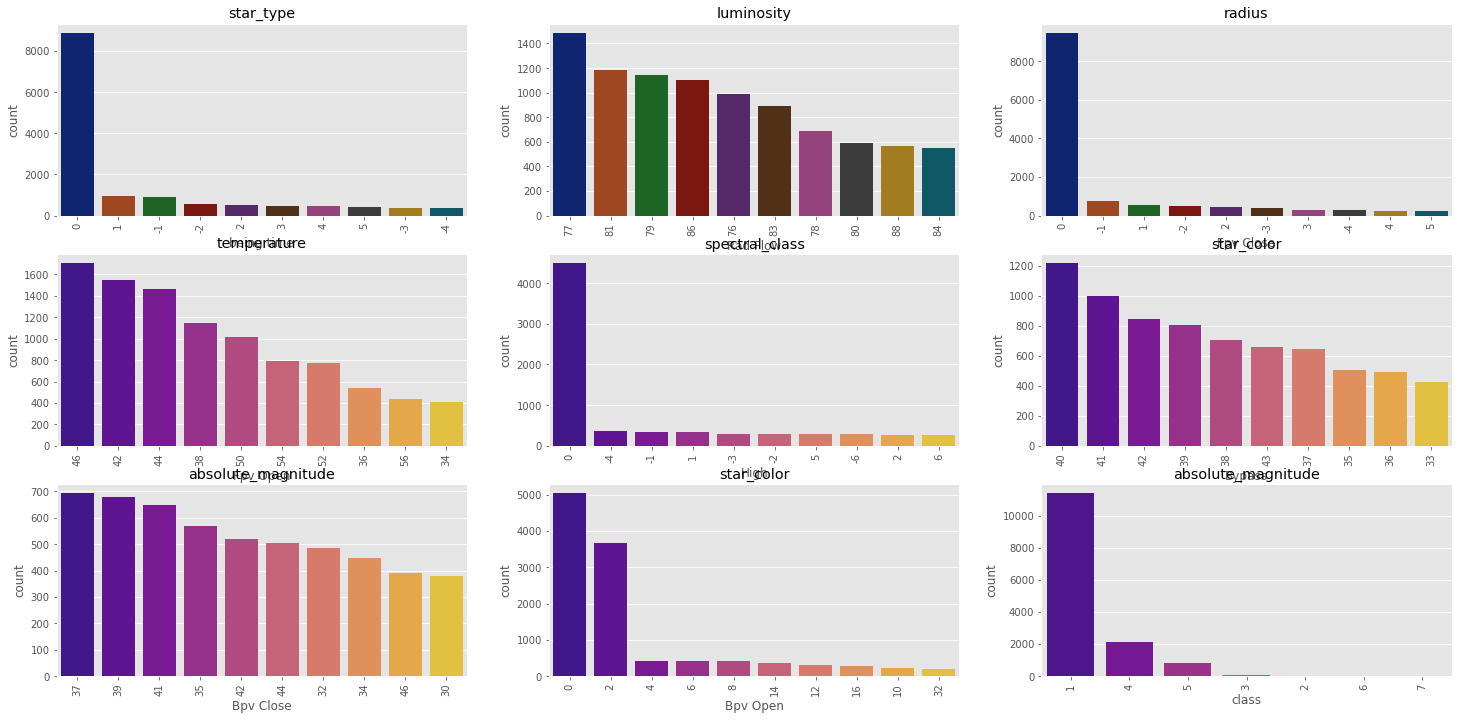

In [18]:
#Frequency Distribution
plt.rcParams['figure.figsize']= 25,12

plt.subplot(331)
sns.countplot(data['being time'],
             order=data['being time'].value_counts().head(10).index,
             palette='dark')
plt.xticks(rotation=90)
plt.title('star_type')

plt.subplot(332)
sns.countplot(data['Rad Flow'],
             order=data['Rad Flow'].value_counts().head(10).index,
             palette='dark')
plt.xticks(rotation=90)
plt.title('luminosity')

plt.subplot(333)
sns.countplot(data['Fpv Close'],
             order=data['Fpv Close'].value_counts().head(10).index,
             palette='dark')
plt.xticks(rotation=90)
plt.title('radius')

plt.subplot(334)
sns.countplot(data['Fpv Open'],
             order=data['Fpv Open'].value_counts().head(10).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('temperature')

plt.subplot(335)
sns.countplot(data['High'],
             order=data['High'].value_counts().head(10).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('spectral_class')

plt.subplot(336)
sns.countplot(data['Bypass'],
             order=data['Bypass'].value_counts().head(10).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('star_color')

plt.subplot(337)
sns.countplot(data['Bpv Close'],
             order=data['Bpv Close'].value_counts().head(10).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('absolute_magnitude')

plt.subplot(338)
sns.countplot(data['Bpv Open'],
             order=data['Bpv Open'].value_counts().head(10).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('star_color')

plt.subplot(339)
sns.countplot(data['class'],
             order=data['class'].value_counts().head(10).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('absolute_magnitude')

plt.show()

By using visulaization for see the VALUE_COUNT, we can observe the label of graph are very messy, therefore we need to deep in mechine learning.

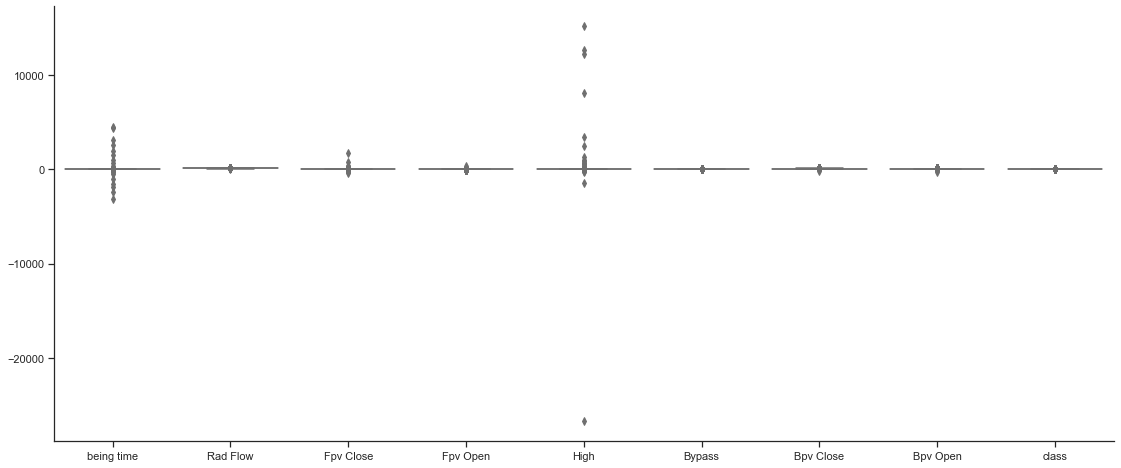

In [19]:
# Finding outliers by using BOXPLOT
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(19,8))
sns.boxplot(data=data)
sns.despine()

## Data Handling - Predictive / Supervised Learning
############################################################################################################################

In [20]:
from sklearn.preprocessing import StandardScaler

#standardizing all the columns
sc=StandardScaler()
scaled=sc.fit_transform(X)

#converted to dataframe to work easily on columns
X=pd.DataFrame(scaled, columns=X.columns)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
#CREATE MACRO
results_df = pd.DataFrame()
columns = ["Model", "Cross Val Score", "pre_macro", "recall_macro", "f1_macro", "f1_macro_manual"]

def evaluate(true, predicted):
    pre_macro = metrics.precision_score(true, predicted, average="macro")
    recall_macro = metrics.recall_score(true, predicted, average="macro")
    f1_macro = metrics.f1_score(true, predicted, average="macro")
    f1_score_raw = metrics.f1_score(true, predicted, average=None)
    f1_macro_manual = f1_score_raw.mean()
    return pre_macro, recall_macro, f1_macro, f1_macro_manual

def append_results(model_name, model, results_df, y_test, pred):
    results_append_df = pd.DataFrame(data=[[model_name, *evaluate(y_test, pred), cross_val_score(model, X, y,cv=5).mean()]], columns=columns)
    results_df = results_df.append(results_append_df, ignore_index = True)
    return results_df

In [23]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
score_knn = accuracy_score(y_test,pred_knn)

In [24]:
print('confusion_matrix KNN      :\n', metrics.confusion_matrix(y_test, pred_knn))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report KNN :\n',metrics.classification_report(y_test, pred_knn))

confusion_matrix KNN      :
 [[2831    0    1    0    0    0    0]
 [   2    0    0    1    0    0    0]
 [   3    0    4    0    0    0    0]
 [   0    0    0  552    0    0    0]
 [   2    0    0    0  198    0    0]
 [   0    0    0    0    2    0    0]
 [   1    0    0    0    0    0    0]]
---------------------------------------------------------------------------------------------------------------------

classification_report KNN :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2832
           2       0.00      0.00      0.00         3
           3       0.80      0.57      0.67         7
           4       1.00      1.00      1.00       552
           5       0.99      0.99      0.99       200
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1

    accuracy                           1.00      3597
   macro avg       0.54      0.51      0.52      3597
weighted avg  

In [25]:
# Train model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred_log = log_reg.predict(X_test)
score_log = accuracy_score(y_test,pred_log)

In [26]:
print('confusion_matrix LogisticRegression      :\n', metrics.confusion_matrix(y_test, pred_log))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report LogisticRegression :\n',metrics.classification_report(y_test, pred_log))

confusion_matrix LogisticRegression      :
 [[2791    0    0   41    0    0    0]
 [   2    0    0    1    0    0    0]
 [   4    0    0    3    0    0    0]
 [  70    0    0  482    0    0    0]
 [   0    0    1    1  198    0    0]
 [   0    0    0    0    1    1    0]
 [   1    0    0    0    0    0    0]]
---------------------------------------------------------------------------------------------------------------------

classification_report LogisticRegression :
               precision    recall  f1-score   support

           1       0.97      0.99      0.98      2832
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.91      0.87      0.89       552
           5       0.99      0.99      0.99       200
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         1

    accuracy                           0.97      3597
   macro avg       0.55      0.48     

In [27]:
svc = SVC()
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)
score_svc = accuracy_score(y_test,pred_svc)

In [28]:
print('confusion_matrix SVC      :\n', metrics.confusion_matrix(y_test, pred_svc))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report SVC :\n',metrics.classification_report(y_test, pred_svc))

confusion_matrix SVC      :
 [[2832    0    0    0    0    0    0]
 [   2    0    0    1    0    0    0]
 [   5    0    1    1    0    0    0]
 [   0    0    0  552    0    0    0]
 [   3    0    0    0  197    0    0]
 [   2    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0]]
---------------------------------------------------------------------------------------------------------------------

classification_report SVC :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2832
           2       0.00      0.00      0.00         3
           3       1.00      0.14      0.25         7
           4       1.00      1.00      1.00       552
           5       1.00      0.98      0.99       200
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1

    accuracy                           1.00      3597
   macro avg       0.57      0.45      0.46      3597
weighted avg  

In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
score_rfc = accuracy_score(y_test,pred_rfc)

In [30]:
print('confusion_matrix RandomForest      :\n', metrics.confusion_matrix(y_test, pred_rfc))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report RandomForest :\n',metrics.classification_report(y_test, pred_rfc))

confusion_matrix RandomForest      :
 [[2832    0    0    0    0    0    0]
 [   0    3    0    0    0    0    0]
 [   3    0    4    0    0    0    0]
 [   0    0    0  552    0    0    0]
 [   1    0    0    0  199    0    0]
 [   0    0    0    0    1    1    0]
 [   1    0    0    0    0    0    0]]
---------------------------------------------------------------------------------------------------------------------

classification_report RandomForest :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2832
           2       1.00      1.00      1.00         3
           3       1.00      0.57      0.73         7
           4       1.00      1.00      1.00       552
           5       0.99      0.99      0.99       200
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         1

    accuracy                           1.00      3597
   macro avg       0.86      0.72      0.77      3

In [31]:
adab = AdaBoostClassifier()
adab.fit(X_train,y_train)
pred_adab = adab.predict(X_test)
score_adab = accuracy_score(y_test,pred_adab)

In [32]:
print('confusion_matrix AdaBoost      :\n', metrics.confusion_matrix(y_test, pred_adab))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report AdaBoost :\n',metrics.classification_report(y_test, pred_adab))

confusion_matrix AdaBoost      :
 [[2766    0    0   66    0    0    0]
 [   3    0    0    0    0    0    0]
 [   6    0    0    1    0    0    0]
 [ 281    0    0  271    0    0    0]
 [   0    0    0  200    0    0    0]
 [   0    0    0    0    0    2    0]
 [   1    0    0    0    0    0    0]]
---------------------------------------------------------------------------------------------------------------------

classification_report AdaBoost :
               precision    recall  f1-score   support

           1       0.90      0.98      0.94      2832
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.50      0.49      0.50       552
           5       0.00      0.00      0.00       200
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         1

    accuracy                           0.84      3597
   macro avg       0.34      0.35      0.35      3597
weig

## Regularization and Optimization all Models
###############################################################################################################################

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
list_knn=[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_s = knn.predict(X_test)
    scores = accuracy_score(y_test,pred_s)
    list_knn.append(scores)

In [34]:
print(max(list_knn))

0.9974979149291076


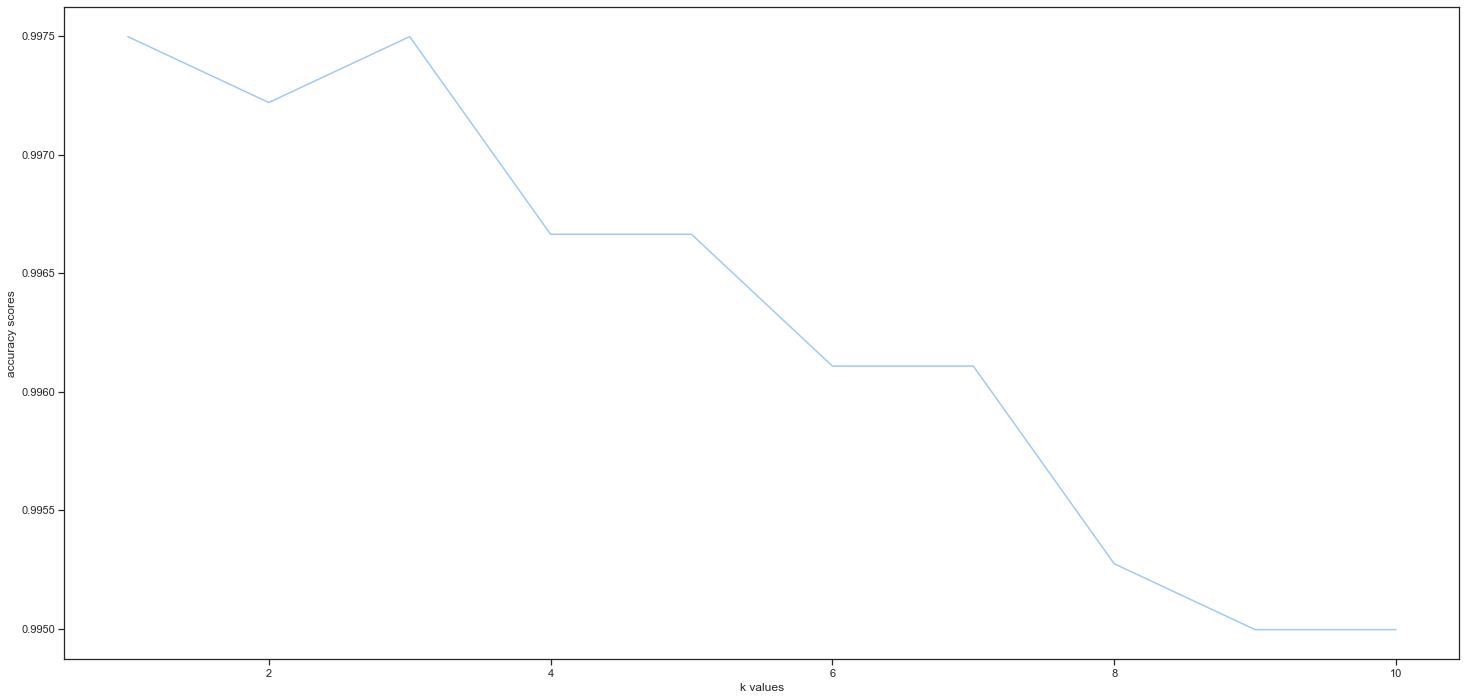

In [35]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),list_knn)
plt.xlabel('k values')
plt.ylabel('accuracy scores')
plt.show()

In [36]:
#KNN TUNING:

#Initiating Random Forest regressor
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#Define the grid of hyperparameters
params_grid = {'n_neighbors': [3,5,10],
              'weights': ['uniform']
              }

#Initiate Grid search
grid_model = GridSearchCV(estimator = knn_model, param_grid = params_grid , cv = 3)
                       
#Fitting the grid search
grid_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10], 'weights': ['uniform']})

In [37]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model.best_score_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred_knn_g = grid_model.best_estimator_.predict(X_test)
print(pred_knn_g[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'n_neighbors': 3, 'weights': 'uniform'}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.9969410456062291
---------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

[1 1 1 4 1 1 1 5 1 4]
[1 1 1 4 1 1 1 5 1 4]


In [38]:
print('confusion_matrix KNN_opt     :\n', metrics.confusion_matrix(y_test, pred_knn_g))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report KNN_opt :\n',metrics.classification_report(y_test, pred_knn_g))

confusion_matrix KNN_opt     :
 [[2830    0    2    0    0    0    0]
 [   0    3    0    0    0    0    0]
 [   3    0    4    0    0    0    0]
 [   0    0    0  552    0    0    0]
 [   2    0    0    0  198    0    0]
 [   0    0    0    0    1    1    0]
 [   1    0    0    0    0    0    0]]
---------------------------------------------------------------------------------------------------------------------

classification_report KNN_opt :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2832
           2       1.00      1.00      1.00         3
           3       0.67      0.57      0.62         7
           4       1.00      1.00      1.00       552
           5       0.99      0.99      0.99       200
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         1

    accuracy                           1.00      3597
   macro avg       0.81      0.72      0.75      3597
weighte

In [39]:
lclassifier = SGDClassifier(loss='hinge',learning_rate='optimal', eta0=0.01, penalty='l2')

In [40]:
#compare that k-fold scores
print("linear regression's 10-fold score:",cross_val_score(lclassifier, X, y, cv=5).mean())

linear regression's 10-fold score: 0.9425790754257907


In [41]:
#Gradient descent can used in different models that have a loss function
'''We are defining a param_grid here to try out different configuration 
(non-exhaustive) which gives us an idea of what values/range of values 
will give a better model to test/deploy 
'''
params = {
            'loss': ['hinge'],
            'penalty':['l2'],
            'alpha': [0.1],
            'l1_ratio':[1],
            'learning_rate':['optimal'],
            'eta0':[0.001],
            'power_t':[0.01]
         }
grid_model2 = GridSearchCV(SGDClassifier(random_state=7), params, cv=4)
grid_model2.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=SGDClassifier(random_state=7),
             param_grid={'alpha': [0.1], 'eta0': [0.001], 'l1_ratio': [1],
                         'learning_rate': ['optimal'], 'loss': ['hinge'],
                         'penalty': ['l2'], 'power_t': [0.01]})

In [42]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model2.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model2.best_score_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred_log_g = grid_model2.best_estimator_.predict(X_test)
print(pred_log_g[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'alpha': 0.1, 'eta0': 0.001, 'l1_ratio': 1, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l2', 'power_t': 0.01}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.8512235817575083
---------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

[1 1 1 5 1 1 1 5 1 1]
[1 1 1 4 1 1 1 5 1 4]


In [43]:
print('confusion_matrix LogesticRegression_opt      :\n', metrics.confusion_matrix(y_test, pred_log_g))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report LogesticRegression_opt :\n',metrics.classification_report(y_test, pred_log_g))

confusion_matrix LogesticRegression_opt      :
 [[2832    0    0    0    0    0    0]
 [   2    0    0    1    0    0    0]
 [   6    0    0    0    1    0    0]
 [ 441    0    0    0  111    0    0]
 [   1    0    0    0  199    0    0]
 [   0    0    0    0    2    0    0]
 [   1    0    0    0    0    0    0]]
---------------------------------------------------------------------------------------------------------------------

classification_report LogesticRegression_opt :
               precision    recall  f1-score   support

           1       0.86      1.00      0.93      2832
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00       552
           5       0.64      0.99      0.78       200
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1

    accuracy                           0.84      3597
   macro avg       0.21      0

In [44]:
svc = SGDClassifier(loss='hinge', learning_rate='constant',eta0=0.5)

In [45]:
print("svc's 5-fold score:",cross_val_score(svc,X,y,cv=5).mean())

svc's 5-fold score: 0.9064303093500173


In [46]:
'''We are defining a param_grid here to try out different configuration 
(non-exhaustive) which gives us an idea of what values/range of values 
will give a better model to test/deploy 
'''
params = {
            'loss': ['hinge'],
            'alpha': [0.001,0.01,0.1,1],
            'l1_ratio':[0,0.5,1],
            'learning_rate':['constant','invscaling','optimal','adaptive'],
            'eta0':[0.001,0.01,0.1,1],
            'power_t':[0.5,1,2]
         }
grid_model3 = GridSearchCV(SGDClassifier(penalty='elasticnet',random_state=7),
                          params,cv=4)
grid_model3.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=SGDClassifier(penalty='elasticnet', random_state=7),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1],
                         'eta0': [0.001, 0.01, 0.1, 1], 'l1_ratio': [0, 0.5, 1],
                         'learning_rate': ['constant', 'invscaling', 'optimal',
                                           'adaptive'],
                         'loss': ['hinge'], 'power_t': [0.5, 1, 2]})

In [47]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model3.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model3.best_score_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred_svc_g = grid_model3.best_estimator_.predict(X_test)
print(pred_svc_g[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'alpha': 0.001, 'eta0': 0.001, 'l1_ratio': 1, 'learning_rate': 'optimal', 'loss': 'hinge', 'power_t': 0.5}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.9317760474601409
---------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

[1 1 1 4 1 1 1 5 1 4]
[1 1 1 4 1 1 1 5 1 4]


In [48]:
print('confusion_matrix SVC_opt      :\n', metrics.confusion_matrix(y_test, pred_svc_g))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report SVC_opt :\n',metrics.classification_report(y_test, pred_svc_g))

confusion_matrix SVC_opt      :
 [[2792    0    0   40    0    0    0]
 [   2    0    0    1    0    0    0]
 [   4    0    0    3    0    0    0]
 [ 146    0    0  406    0    0    0]
 [   0    0    0    1  198    1    0]
 [   0    0    0    2    0    0    0]
 [   1    0    0    0    0    0    0]]
---------------------------------------------------------------------------------------------------------------------

classification_report SVC_opt :
               precision    recall  f1-score   support

           1       0.95      0.99      0.97      2832
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         7
           4       0.90      0.74      0.81       552
           5       1.00      0.99      0.99       200
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1

    accuracy                           0.94      3597
   macro avg       0.41      0.39      0.40      3597
weight

In [49]:
#Graph k-fold score vs no. of estimators in Random Forest
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(RandomForestClassifier(n_estimators=i,random_state=0),
                                 X,y,cv=5).mean())

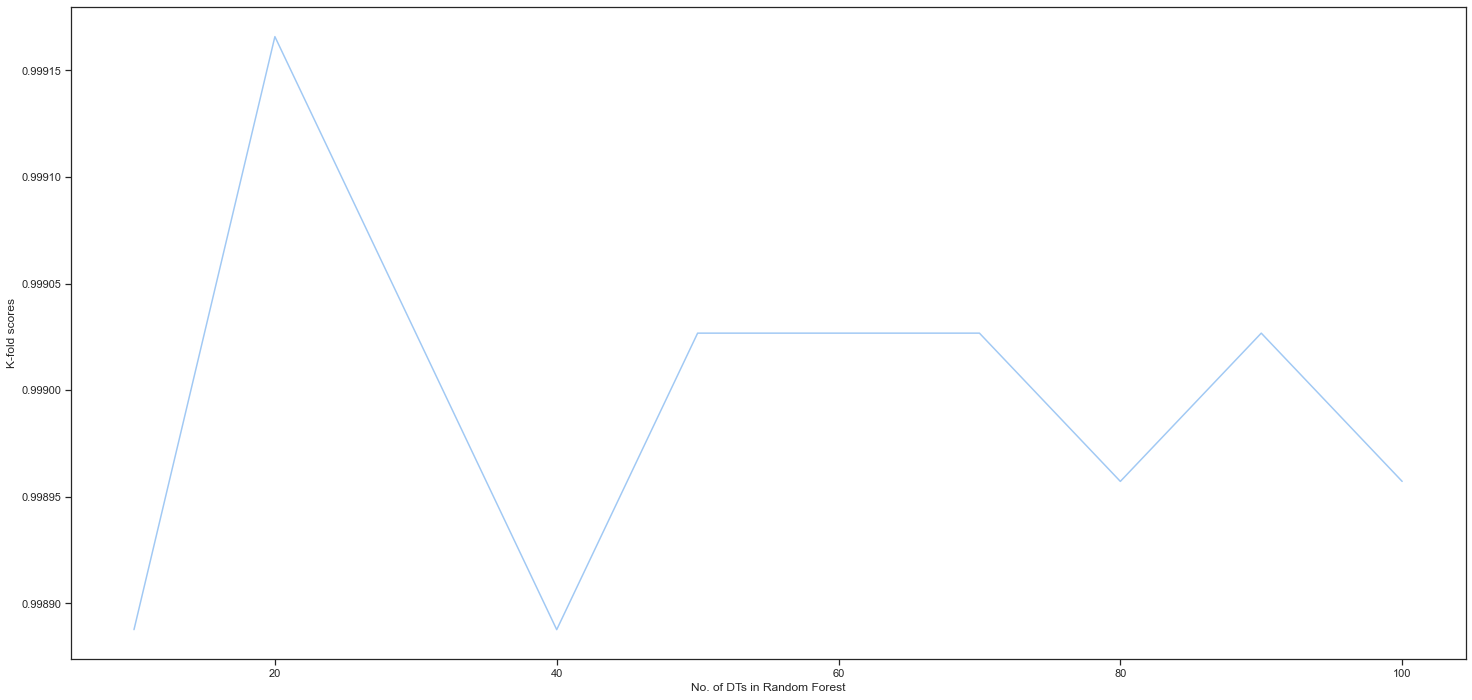

In [50]:
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in Random Forest')
plt.ylabel('K-fold scores')
plt.show()

In [51]:
#including other params like max_depth, we will apply gridsearch to fine the best settings for the RF
params = {
            'n_estimators': [100,115,120],
            'max_depth': [12,13,14]
        }
grid_model4 = GridSearchCV(RandomForestClassifier(random_state=0), params,cv=15)
grid_model4.fit(X,y)

GridSearchCV(cv=15, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [12, 13, 14],
                         'n_estimators': [100, 115, 120]})

In [52]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model4.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model4.best_score_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred_rfo = grid_model4.best_estimator_.predict(X_test)
print(pred_rfo[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'max_depth': 12, 'n_estimators': 100}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.9991657977059437
---------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

[1 1 1 4 1 1 1 5 1 4]
[1 1 1 4 1 1 1 5 1 4]


In [53]:
print('confusion_matrix RandomForest_opt      :\n', metrics.confusion_matrix(y_test, pred_rfo))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report RandomForest_opt :\n',metrics.classification_report(y_test, pred_rfo))

confusion_matrix RandomForest_opt      :
 [[2832    0    0    0    0    0    0]
 [   0    3    0    0    0    0    0]
 [   0    0    7    0    0    0    0]
 [   0    0    0  552    0    0    0]
 [   0    0    0    0  200    0    0]
 [   0    0    0    0    0    2    0]
 [   0    0    0    0    0    0    1]]
---------------------------------------------------------------------------------------------------------------------

classification_report RandomForest_opt :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2832
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00       552
           5       1.00      1.00      1.00       200
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           1.00      3597
   macro avg       1.00      1.00      1.0

In [54]:
#Graph k-fold score vs no. of estimators in Adaboost which uses DT as base estimators
scores = []
for i in range(1,100,10):
    scores.append(cross_val_score(AdaBoostClassifier(n_estimators=i,random_state=0),
                                  X,y,cv=5).mean())

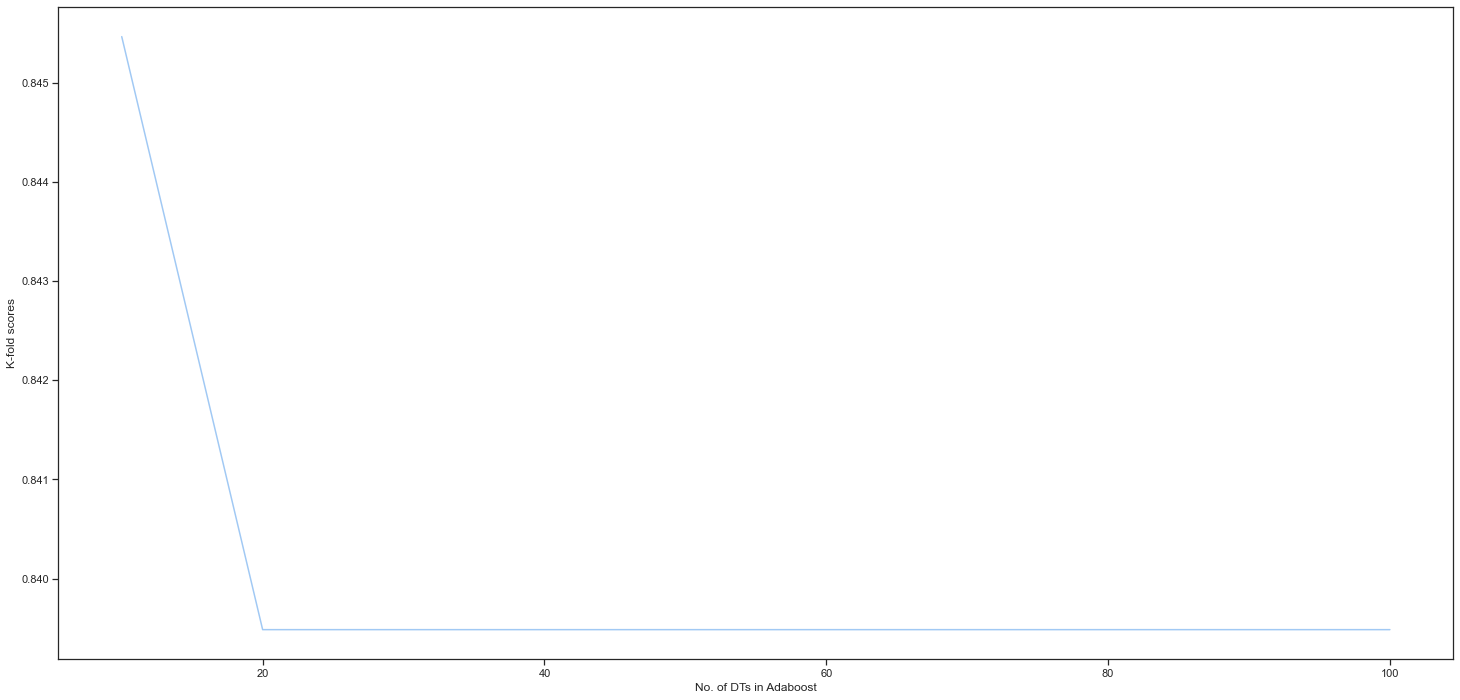

In [55]:
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in Adaboost')
plt.ylabel('K-fold scores')
plt.show()

In [56]:
#including other params like max_depth, we will apply gridsearch to fine the best settings 
params = {
            'n_estimators': [0.1,1,5,10],
            'base_estimator': [DecisionTreeClassifier(max_depth=13,random_state=0),
                               DecisionTreeClassifier(max_depth=14,random_state=0),
                               DecisionTreeClassifier(max_depth=16,random_state=0)]
        }
grid_model5 = GridSearchCV(AdaBoostClassifier(random_state=0), params,cv=15)
grid_model5.fit(X,y)

GridSearchCV(cv=15, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=13,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=14,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=16,
                                                                   random_state=0)],
                         'n_estimators': [0.1, 1, 5, 10]})

In [57]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model5.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model5.best_score_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred_adab_o = grid_model5.best_estimator_.predict(X_test)
print(pred_adab_o[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'base_estimator': DecisionTreeClassifier(max_depth=13, random_state=0), 'n_estimators': 1}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.9990267639902677
---------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

[1 1 1 4 1 1 1 5 1 4]
[1 1 1 4 1 1 1 5 1 4]


In [58]:
print('confusion_matrix  AdaBoost_opt      :\n', metrics.confusion_matrix(y_test, pred_adab_o))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('classification_report AdaBoost_opt :\n',metrics.classification_report(y_test, pred_adab_o))

confusion_matrix  AdaBoost_opt      :
 [[2832    0    0    0    0    0    0]
 [   0    3    0    0    0    0    0]
 [   0    0    7    0    0    0    0]
 [   0    0    0  552    0    0    0]
 [   0    0    0    0  200    0    0]
 [   0    0    0    0    0    2    0]
 [   0    0    0    0    0    0    1]]
---------------------------------------------------------------------------------------------------------------------

classification_report AdaBoost_opt :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2832
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00       552
           5       1.00      1.00      1.00       200
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           1.00      3597
   macro avg       1.00      1.00      1.00      

### CONCLUSION
###############################################################################################################################

In [59]:
print('Display Accuracy, Recall and Precision For Classification Models')
print('--------------------------------------------------------------------------------------------------------------------\n')
print('---------------------------------------------------------------------------------------------------------------------\n')
print('-----------------------------------------------------------------------------------------------------------------------')
print('*********************************...........INFERENCE AND CONCLUSION.............**************************************')
print('-----------------------------------------------------------------------------------------------------------------------')
results_df = append_results("KNN", knn, results_df, y_test, pred_knn)
results_df = append_results("Logestic Regression", log_reg, results_df, y_test, pred_log)
results_df = append_results("SVC", svc, results_df, y_test, pred_svc)
results_df = append_results("Random Forest", rfc, results_df, y_test, pred_rfc)
results_df = append_results("Ada Boost", adab, results_df, y_test, pred_adab)
results_df = append_results("KNN_opt", grid_model, results_df, y_test, pred_knn_g)
results_df = append_results("LogesticRegression_opt", grid_model2, results_df, y_test, pred_log_g)
results_df = append_results("SVC_opt", grid_model3, results_df, y_test, pred_svc_g)
results_df = append_results("Random Forest_opt", grid_model4, results_df, y_test, pred_rfo)
results_df = append_results("Ada Boost_opt", grid_model5, results_df, y_test, pred_adab_o)
results_df

Display Accuracy, Recall and Precision For Classification Models
--------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------
*********************************...........INFERENCE AND CONCLUSION.............**************************************
-----------------------------------------------------------------------------------------------------------------------


,Model,Cross Val Score,pre_macro,recall_macro,f1_macro,f1_macro_manual
0,KNN,0.54,0.51,0.52,0.52,1.00
1,Logestic Regression,0.55,0.48,0.50,0.50,0.96
2,SVC,0.57,0.45,0.46,0.46,0.92
3,Random Forest,0.86,0.72,0.77,0.77,1.00
4,Ada Boost,0.34,0.35,0.35,0.35,0.84
5,KNN_opt,0.81,0.72,0.75,0.75,1.00
6,LogesticRegression_opt,0.21,0.29,0.24,0.24,0.85
7,SVC_opt,0.41,0.39,0.40,0.40,0.94
8,Random Forest_opt,1.00,1.00,1.00,1.00,1.00
9,Ada Boost_opt,1.00,1.00,1.00,1.00,1.00


In [60]:
#OPTIMIZED RANDOM FOREST,and ADA BOOST ARE THE BEST MODEL FIT WITH ACCURACY AT 100%. CHOOSING RANDOM FOREST SEEMS MORE LOGICAL BECAUSE IT IS LESS COMPELICATED THAN ADABOOST.